# Part 2 - 2 Point Stats

 - artificial microstructures
 
 - microstructure function
 
 - 2 point stats
 
 - dimensionality reduction
 
 - dask
 
 - classify microstructure

In [55]:
import numpy as np
from pymks.bases import PrimitiveBasis

In [180]:
?PrimitiveBasis

In [56]:
data_cat = np.array([[1, 2, 0]])

In [57]:
basis = PrimitiveBasis(n_states=3, domain=[0, 2])
data_disc = basis.discretize(data_cat)

In [58]:
print(data_cat.shape)
print(data_disc.shape)

(1, 3)
(1, 3, 3)


In [59]:
print(data[0, 0])
print(data_disc[0, 0, 0])

1
0.0


In [97]:
data_con = np.array([[0.1, 0.5, 0.3]])

In [98]:
basis = PrimitiveBasis(n_states=5, domain=[0, 1])
data_disc = basis.discretize(data_con)

In [99]:
print(data_con.shape)
print(data_disc.shape)

(1, 3)
(1, 3, 5)


In [100]:
print(data_con[0, 0])
print(data_disc[0, 0])

0.1
[ 0.6  0.4  0.   0.   0. ]


In [165]:
data_leg = np.array([[-0.5, 0.1, 0.9]])

In [173]:
from pymks.bases import LegendreBasis
basis = LegendreBasis(n_states=4, domain=[-1, 1])

In [174]:
data_disc = basis.discretize(data_leg)
print(data_disc.shape)

(1, 3, 4)


In [175]:
print(data_disc)

[[[ 0.5     -0.75    -0.3125   1.53125]
  [ 0.5      0.15    -1.2125  -0.51625]
  [ 0.5      1.35     1.7875   1.65375]]]


In [169]:
from scipy.special import eval_legendre

In [176]:
eval_legendre(np.arange(4), -0.5) * (np.arange(4) + 0.5)

array([ 0.5    , -0.75   , -0.3125 ,  1.53125])

## Construct Artificial Microstructures

In [181]:
from pymks.datasets import make_microstructure

In [182]:
?make_microstructure

In [201]:
data = make_microstructure(grain_size=(20, 20))

In [202]:
print(data.shape)

(10, 101, 101)


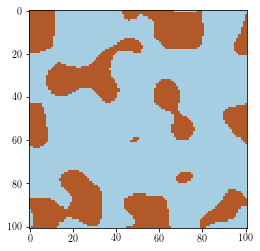

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Paired'

plt.imshow(data[0]);

## Fiber Microstructure

In [262]:
data_fiber = make_microstructure(grain_size=(95, 15))

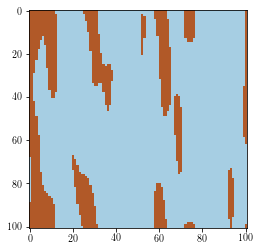

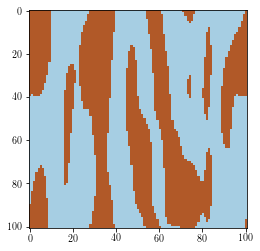

In [263]:
plt.imshow(data_fiber[0])
plt.show()
plt.imshow(data_fiber[1])
plt.show()

## 2 Point Stats

In [264]:
np.random.seed(0)

data_blob = make_microstructure(n_samples=50, grain_size=(30, 30))
data_fiber_v = make_microstructure(n_samples=50, grain_size=(100, 10))
data_fiber_h = make_microstructure(n_samples=50, grain_size=(10, 100))

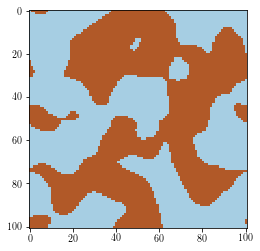

In [265]:
plt.imshow(data_blob[2]);

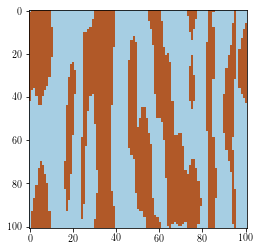

In [266]:
plt.imshow(data_fiber_v[1]);

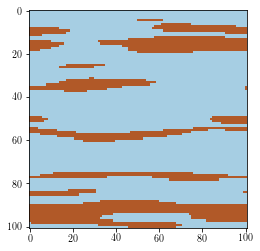

In [267]:
plt.imshow(data_fiber_h[0]);

In [268]:
data_fiber_v.shape

(50, 101, 101)

In [269]:
data = np.concatenate([data_blob, data_fiber_v, data_fiber_h], axis=0)

In [270]:
data.shape

(150, 101, 101)

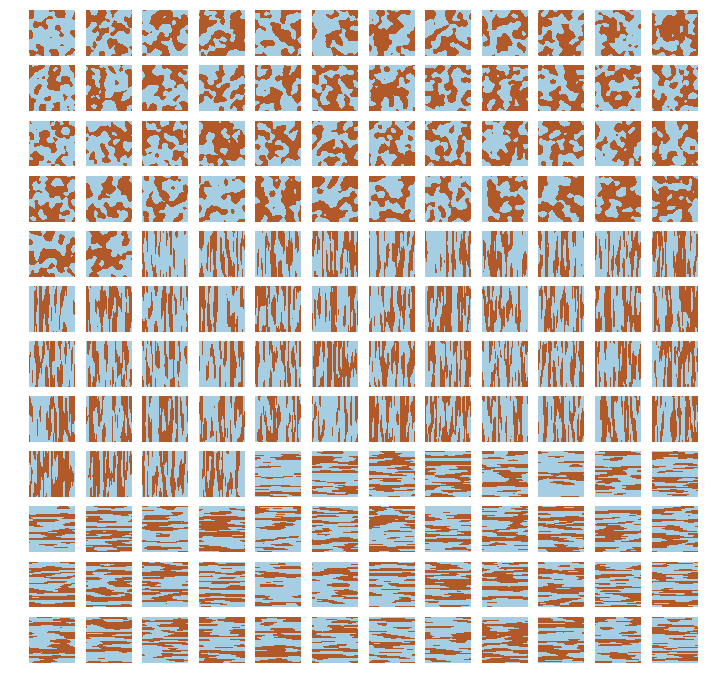

In [271]:
fig = plt.figure(figsize=(12, 12))
for i in range(12):
    for j in range(12):
        count = i * 12 + j
        ax = fig.add_subplot(12, 12, count + 1)
        ax.set_aspect('equal')
        img = plt.imshow(data[count])
        plt.axis('off')
        img.set_cmap('Paired')

# 2 Point Stats

In [272]:
from pymks.stats import correlate

basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_corr = correlate(data, basis=basis)

In [273]:
data_corr.shape

(150, 101, 101, 3)

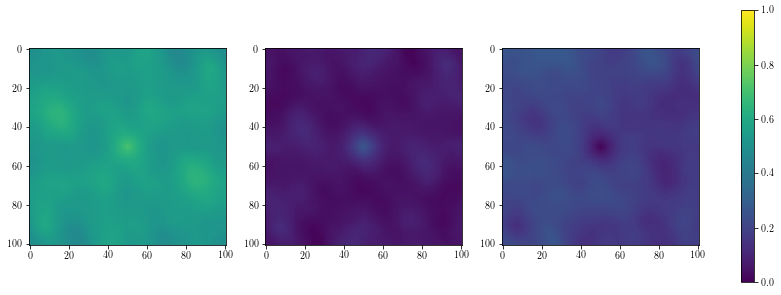

In [274]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[0, :, :, i], vmin=0.0, vmax=1.0, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [275]:
print(data_corr[0, :, :, 0] + data_corr[0, :, :, 1] + data_corr[0, :, :, 2] + data_corr[0, ::-1, ::-1, 2])

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


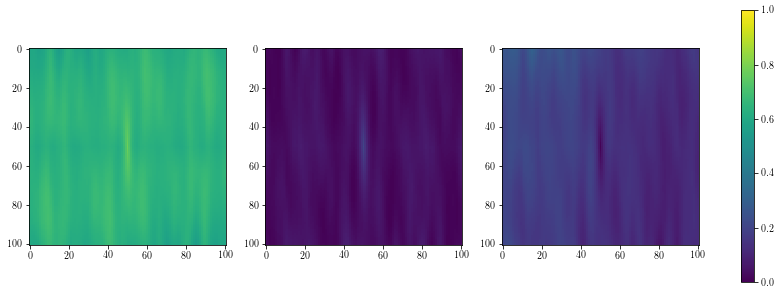

In [276]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[50, :, :, i], vmin=0.0, vmax=1.0, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

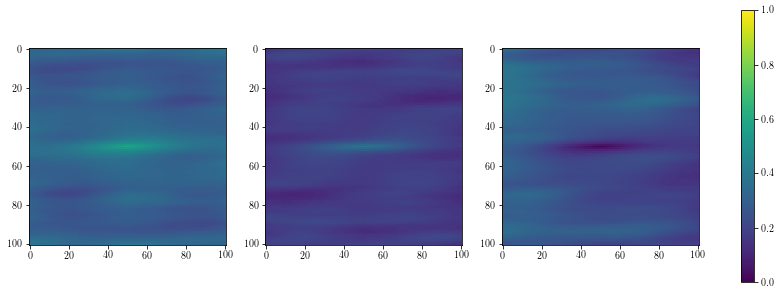

In [277]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[-1, :, :, i], vmin=0.0, vmax=1.0, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [278]:
data_corr.shape

(150, 101, 101, 3)

## Dimensionality Reduction

In [279]:
data_reshape = np.reshape(data_corr, (data_corr.shape[0], data_corr[0].size))

In [280]:
print(data_reshape.shape)

(150, 30603)


In [281]:
data_mean = data_reshape - np.mean(data_reshape, axis=1)[:, None]

In [282]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=5)

In [283]:
data_pca = pca_model.fit_transform(data_mean)

In [284]:
data_pca.shape

(150, 5)

/home/wd15/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


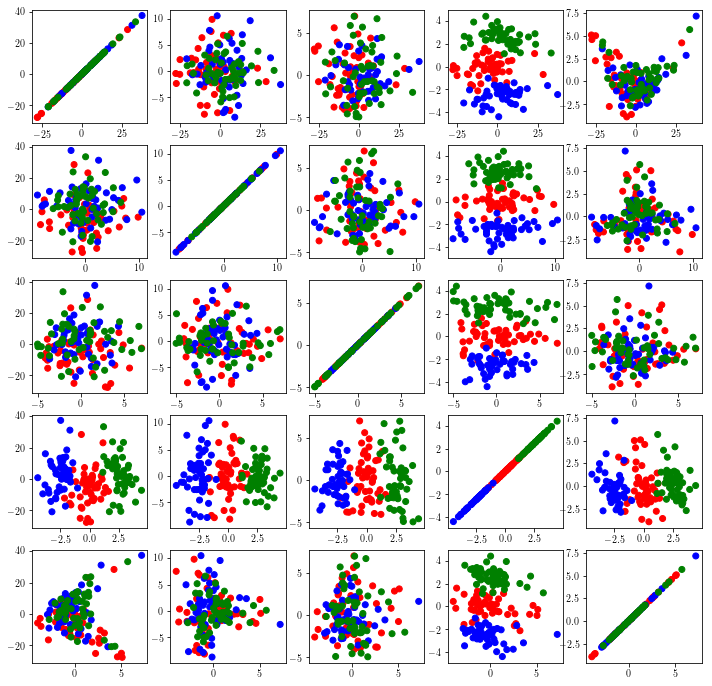

In [285]:
# NBVAL_IGNORE_OUTPUT

colors = ['r'] * 50 + ['b'] * 50 + ['g'] * 50

fig, axss = plt.subplots(5, 5)

for i, axs in enumerate(axss):
    for j, ax in enumerate(axs):
        ax.scatter(data_pca[:, i], data_pca[:, j], color=colors)
fig.set_size_inches(12, 12)
fig.show()

In [286]:
classification = np.concatenate([np.zeros(50), np.ones(50), np.ones(50) + 1]).astype(int)

In [287]:
# NBVAL_SKIP

from bqplot import pyplot as bq_plt

bq_plt.figure(title="Scatter Plot with colors")
bq_plt.scatter(data_pca[:, 2], data_pca[:, 3], color=classification)
bq_plt.show()

## Using Dask

In [240]:
# NBVAL_IGNORE_OUTPUT

%timeit correlate(data, basis=basis)

7.89 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [242]:
print(data.shape)

(150, 101, 101)


In [243]:
data_corr.shape

(150, 101, 101, 3)

In [244]:
import dask.array as da

data_da = da.from_array(data, chunks=(5, 101, 101))

print(data_da.shape)
print(data_da.chunks)

(150, 101, 101)
((5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5), (101,), (101,))


In [245]:
# NBVAL_IGNORE_OUTPUT

import dask.threaded
import dask.multiprocessing

def correlate_(data_):
    basis = PrimitiveBasis(n_states=2, domain=[0, 1])
    return correlate(data_, basis=basis)

data_da = da.from_array(data, chunks=(5, 101, 101))

map_ = da.map_blocks(correlate_, data_da, new_axis=1)

%timeit map_.compute(num_workers=2, get=dask.multiprocessing.get)

5.23 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [246]:
# NBVAL_IGNORE_OUTPUT

%timeit map_.compute(num_workers=4, get=dask.multiprocessing.get)

4.77 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [247]:
# NBVAL_IGNORE_OUTPUT

%timeit map_.compute(get=dask.threaded.get)

4.16 s ± 55.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Classification

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
model = LogisticRegression(C=1)
model.fit(data_pca, classification)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [290]:
classification_pred = model.predict(data_pca)

In [291]:
# NBVAL_IGNORE_OUTPUT

from sklearn.metrics import confusion_matrix

confusion_matrix(classification, classification_pred)

array([[42,  4,  4],
       [ 2, 48,  0],
       [ 0,  0, 50]])

# Train Test Split

In [292]:
X, y = np.reshape(data, (data.shape[0], data[0].size)), classification

In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [294]:
print(X_train.shape)

(112, 10201)


In [295]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
train_index, test_index = next(skf.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [296]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


def transform(X):
    X_ = np.reshape(X, (X.shape[0],) + data[0].shape)
    basis = PrimitiveBasis(n_states=2, domain=[0, 1])
    X_ = correlate(X, basis=basis)
    X_ = np.reshape(X_, (X_.shape[0], X_[0].size))
    return X_ - np.mean(X_, axis=1)[:, None]
    
transformer = FunctionTransformer(transform)

model = Pipeline([('transformer', transformer),
                  ('pca', PCA(n_components=5)),
                  ('classifier', LogisticRegression())])

In [297]:
# NBVAL_IGNORE_OUTPUT

model.fit(X_train, y_train)

Pipeline(steps=[('transformer', FunctionTransformer(accept_sparse=False,
          func=<function transform at 0x7fc2b5ecbe18>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_so...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [298]:
y_pred = model.predict(X_test)

In [299]:
# NBVAL_IGNORE_OUTPUT

mat = confusion_matrix(y_test, y_pred)
print(mat)

[[13  7  5]
 [ 0 25  0]
 [ 0  0 25]]


## Cross-validate

`cross_val_score` uses `StratifiedKFold` for labeled data

In [300]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)

[ 0.9         0.93333333  0.86666667  0.96666667  0.9       ]
